In [59]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Firstly, the Healthcare data set must be imported

In [117]:
data = pd.read_csv('HealthcareData.csv')

In [118]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


###   Preliminary analysis:

Perform preliminary data inspection and report the findings as to the structure of the data, missing values, duplicates, etc.
Based on the findings from the previous question remove duplicates (if any) , treat missing values using an appropriate strategy.

In [119]:
#The structure of the data can be discover by simply using the .shape function
data.shape

(303, 14)

In [120]:
# Finding the missing values using is null together with the sum function
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

As we can see, there are no missing values so nothing needs to be removed from the dataset.

In [121]:
# Now we can find the number of duplicates using the duplicate function
data.duplicated().sum()

1

In [122]:
dup = data[data.duplicated()]
dup

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [123]:
# We see there is one duplication, we can now drop it
data.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


We now see the number of rows has been reduced by 1!

Before we begin some analysis, lets clean up some of the columns to help with understanding the data

In [124]:
data.rename(columns={'cp':'chest_pain_type','trestbps':'resting_blood_pressure','chol':'cholesterol',
                     'fbs':'fasting_blood_sugar','restecg':'resting_electrocardiographic_results',
                     'thalach':'maximum_heart_rate_achieved','exang':'exercise_induced_angina',
                     'oldpeak':'ST.depression(exercise/rest)','ca':'no_of_major_vessels',
                     'thal':'thalassemia' },inplace=True)

In [125]:
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar',
       'resting_electrocardiographic_results', 'maximum_heart_rate_achieved',
       'exercise_induced_angina', 'ST.depression(exercise/rest)', 'slope',
       'no_of_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [126]:
#First, we are going to separate the data into numerical and categorical to help with calculations
list(enumerate(data))

[(0, 'age'),
 (1, 'sex'),
 (2, 'chest_pain_type'),
 (3, 'resting_blood_pressure'),
 (4, 'cholesterol'),
 (5, 'fasting_blood_sugar'),
 (6, 'resting_electrocardiographic_results'),
 (7, 'maximum_heart_rate_achieved'),
 (8, 'exercise_induced_angina'),
 (9, 'ST.depression(exercise/rest)'),
 (10, 'slope'),
 (11, 'no_of_major_vessels'),
 (12, 'thalassemia'),
 (13, 'target')]

In [127]:
# Now lets separate
numeric_data = data.iloc[:,[0,3,4,7,9]]
numeric_data.head(1)

,age,resting_blood_pressure,cholesterol,maximum_heart_rate_achieved,ST.depression(exercise/rest)
0,63,145,233,150,2.3


In [128]:
categoric_data = data.iloc[:,[1,2,5,6,8,10,11,12,13]]
categoric_data.head(1)

,sex,chest_pain_type,fasting_blood_sugar,resting_electrocardiographic_results,exercise_induced_angina,slope,no_of_major_vessels,thalassemia,target
0,1,3,1,0,0,0,0,1,1


In [129]:
# Now to get a statistical summary of the numeric data by using the describe function
numeric_data.describe()

,age,resting_blood_pressure,cholesterol,maximum_heart_rate_achieved,ST.depression(exercise/rest)
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


#### Spread of data

To get a nice visual spread of the data, we will use histograms of the numeric data

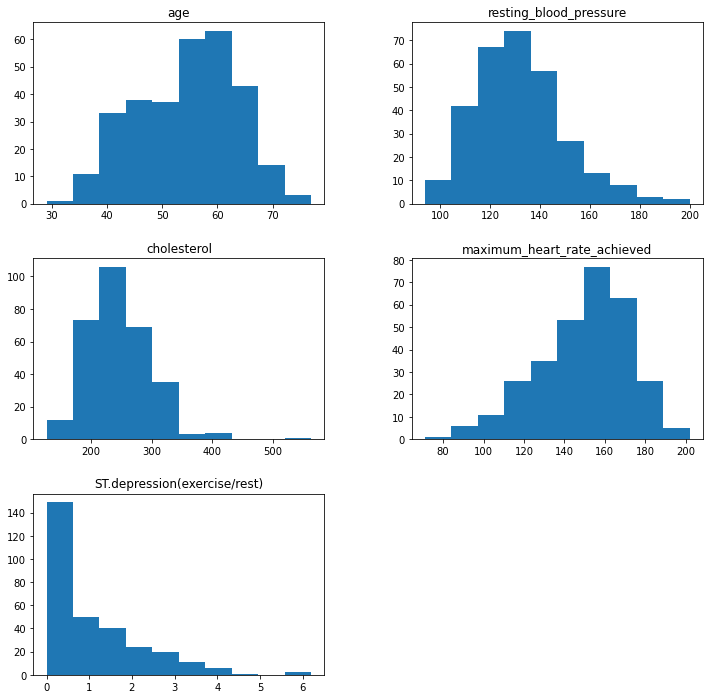

In [130]:
numeric_data.hist(figsize = [12,12],  grid = False)
plt.show()

From this, we can deduce the following:

Age, resting BP, cholesterol and max heartrate are normally distributed.

ST.depressiopn is right skewed while maximum heart rate achieved is left skewed.

In [133]:
sick_data = data[data.target == 1]

Text(0, 0.5, 'Count')

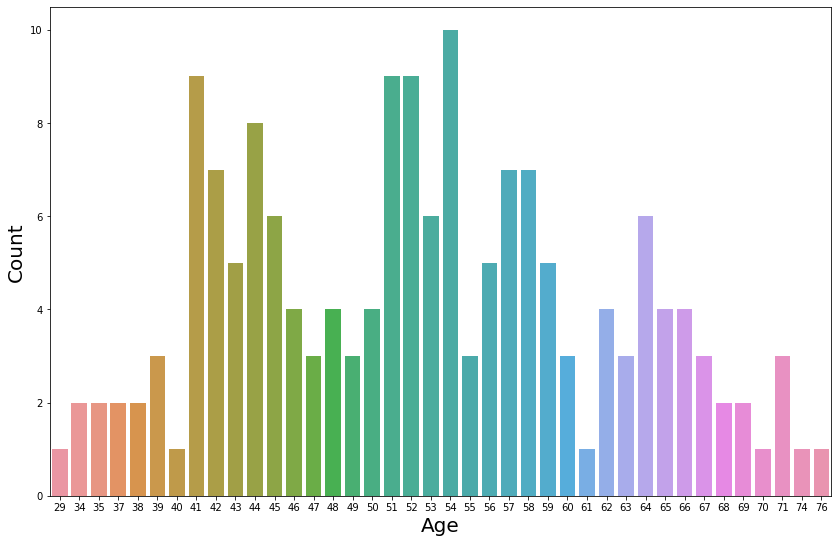

In [138]:
# Now to start comparing the various CVDs across age using Seaborn's count plots
plt.figure(figsize = [14,9])
sns.countplot(x = 'age', data = sick_data)
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Count', fontsize = 20)

As we can see, the prime age of CVDs occuring tend to be around 54 years old. 

Lets take a look at the differences in respect to gender.

Text(0, 0.5, 'Count')

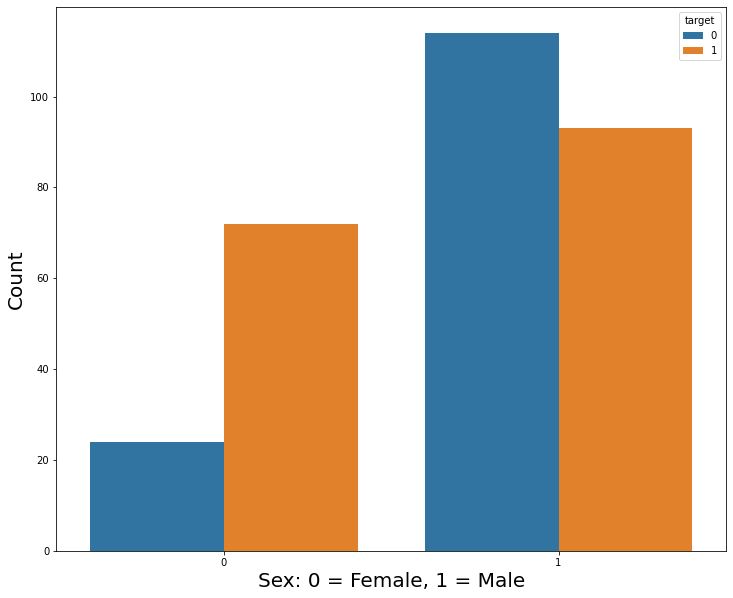

In [75]:
plt.figure(figsize = [12,10])
sns.countplot(x = 'sex', hue = 'target', data = data)
plt.xlabel('Sex: 0 = Female, 1 = Male', fontsize = 20)
plt.ylabel('Count', fontsize = 20)

Text(0, 0.5, 'Resting Blood Pressure')

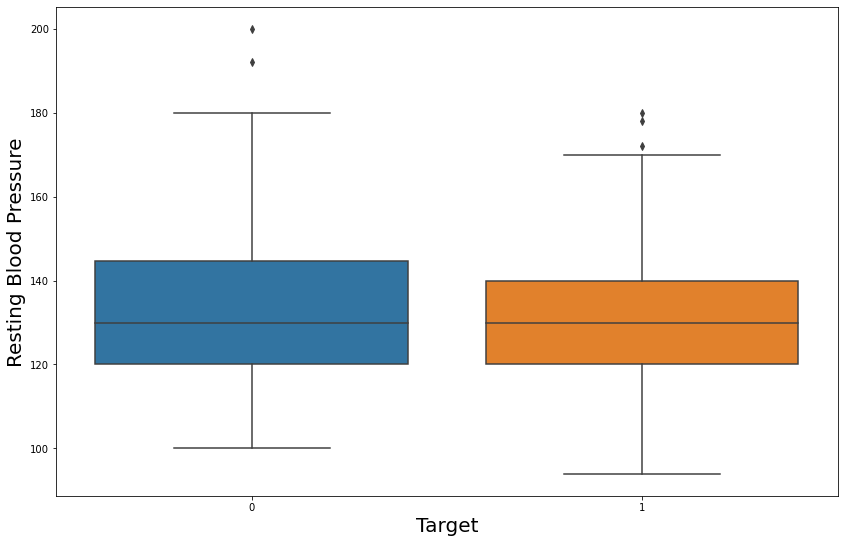

In [145]:
# Can we detect a heart attack based on anomalies in the Resting Blood Pressure of patients?
plt.figure(figsize = [14,9])
sns.boxplot(x = 'target' , y = 'resting_blood_pressure', data = data)
plt.xlabel('Target', fontsize = 20)
plt.ylabel('Resting Blood Pressure', fontsize = 20)

Judging from above, it seems that people with who have heart problems (target 1) seem to have a similar resting blood pressure to those without.

Therefore heart attack based anomalies cannot be deteced using resting blood pressure.

Describe the relationship between cholesterol and targer

In [160]:
corr = data[['cholesterol','target']].corr()

<AxesSubplot:>

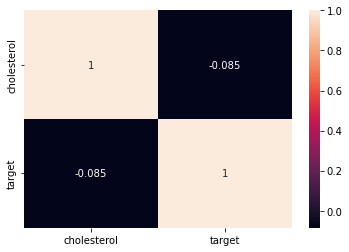

In [161]:
sns.heatmap(corr, annot= True)

Surprisingly, patients that do not experience CVDs tend to have a slightly higher cholesterol level on average than those that do.

It must be noted that there are more outliers of those who experience CVDs to have higher cholesterol values.

There is also a negative correlation between the two.

Text(0, 0.5, 'ST Depression')

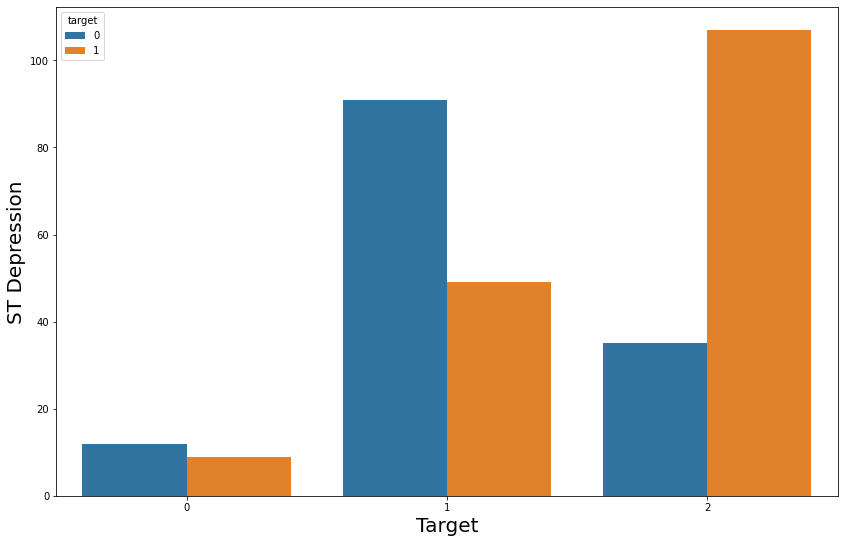

In [162]:
plt.figure(figsize = [14,9])
sns.countplot(x="slope",data= data, hue= "target")
plt.xlabel('Target', fontsize = 20)
plt.ylabel('ST Depression', fontsize = 20)

People with Downsloping(2) have more people prone to heart attack. Peak exercising is poitively correlated to the target variable.

### Is thalassemia a major cause of CVD?

In [163]:
data.thalassemia.corr(data.target)

-0.3440292680383096

<AxesSubplot:xlabel='thalassemia', ylabel='count'>

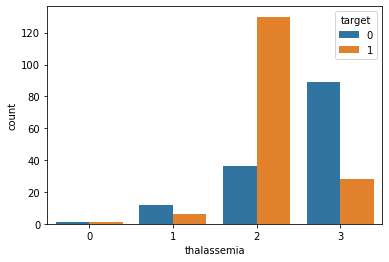

In [164]:
sns.countplot(x="thalassemia",data= data, hue= "target")

Thalassemia--0=Null, 1= Normal, 2= Fixed Defect, 3=Reversable defect. People with fixed defect are at higher risk of CVD

### How are the other factors determining the occurrence of CVD?

In [167]:
new_data = data.drop(columns =["thalassemia","cholesterol","slope"])

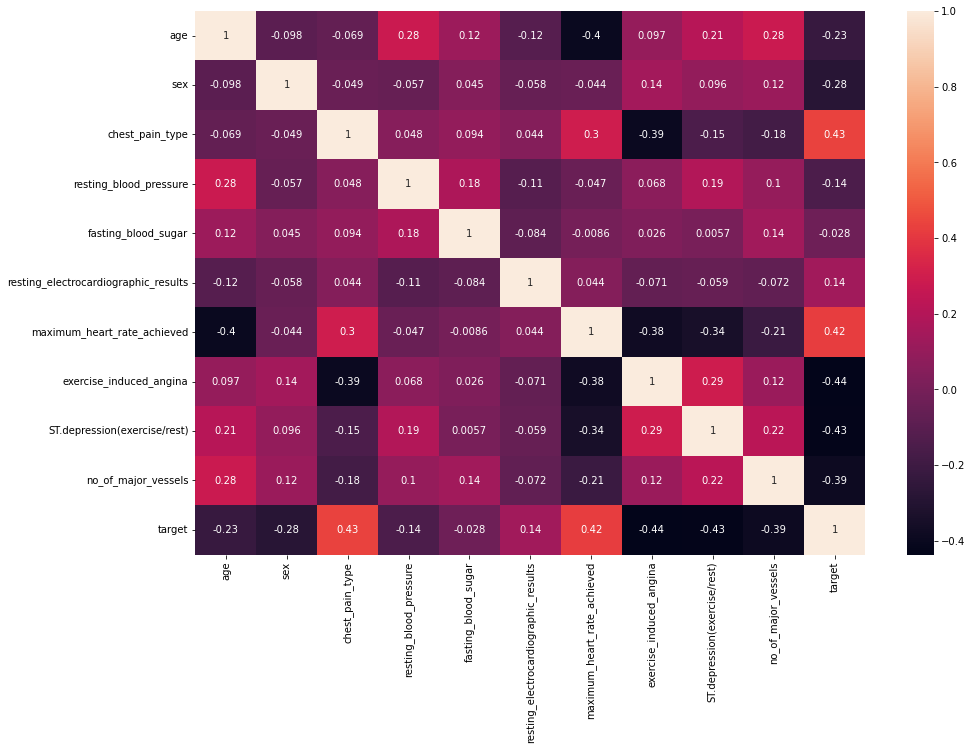

In [168]:
plt.figure(figsize = (15,10))
sns.heatmap(new_data.corr(), annot = True)
plt.show()


### Use a pair plot to understand the relationship between all the given variables.

<Figure size 720x576 with 0 Axes>

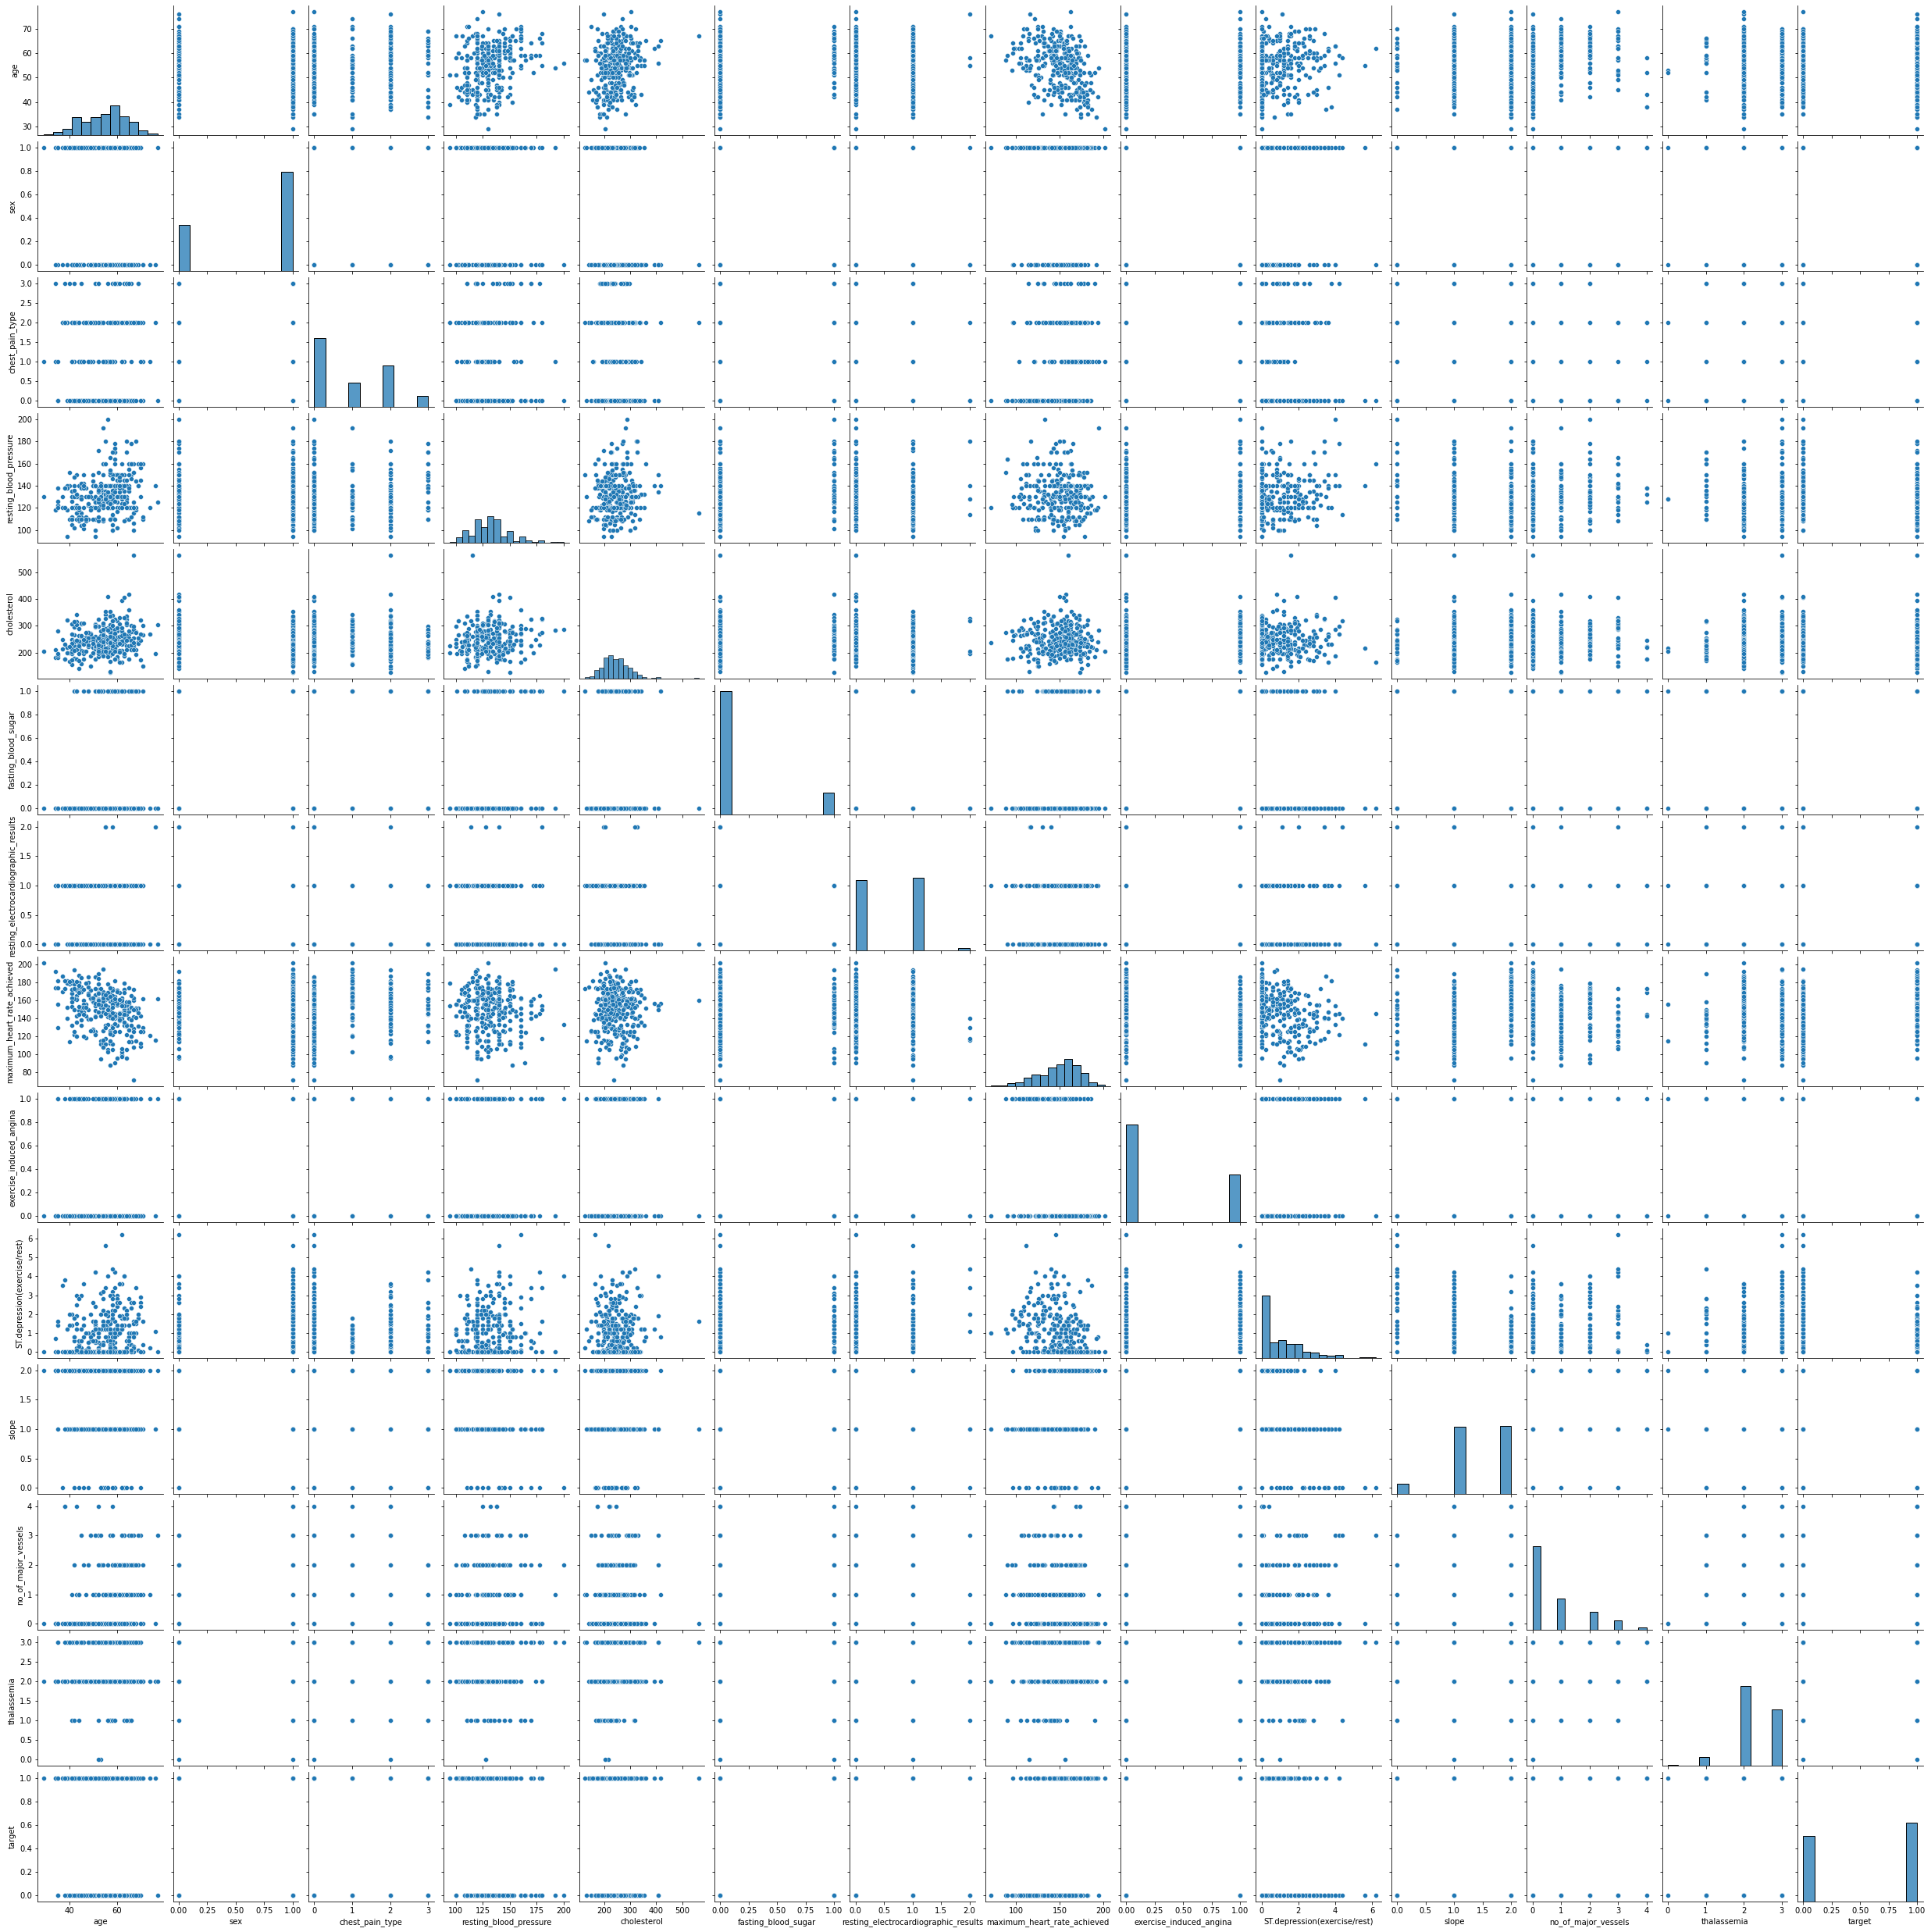

In [169]:
plt.figure(figsize=(10,8))
sns.pairplot(data)
plt.show()

### Perform logistic regression, predict the outcome for test data, and validate the results by using the confusion matrix.

In [170]:
df = data.copy()

In [171]:
X = df.drop(["target"],axis=1)
y = df["target"]

In [172]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1234)

In [173]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((242, 13), (61, 13), (242,), (61,))

For training we have 241 data points and for testing we have 61

In [174]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [175]:
log.fit(X_train,y_train)

C:\Users\BenjaminJones\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [176]:
y_pred = log.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [177]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)

In [178]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72        28
           1       0.75      0.82      0.78        33

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



Accuracy for the logistic regression model is 75%